In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
oregon = pd.read_csv('2005_-_2014_Fire_Data.csv')

/Users/johnwu/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,11,14,18,19,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
oregon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74224 entries, 0 to 74223
Data columns (total 32 columns):
FireYear                  28490 non-null object
Current_District          28489 non-null float64
Current_Unit              28489 non-null float64
FireNumber                28489 non-null float64
FiscalYear                28490 non-null object
FireName                  28474 non-null object
Twn                       25903 non-null object
Rng                       25901 non-null object
Sec                       25861 non-null float64
Subdiv                    22398 non-null object
County                    28465 non-null float64
CauseByDesc               10987 non-null object
GeneralDesc               28030 non-null object
SpecificDesc              24867 non-null object
Cause_Comments            10276 non-null object
General_Restriction       11061 non-null float64
Industrial_Restriction    11060 non-null float64
Burn_Index                2883 non-null float64
RegulatedUseZone    

# Initial inspection of dataframe: 

1. Total of 74224 entries with approximately 28000 entries as the maximum amount of non-null objects.  This means that there must be a lot of rows and entries that have null values.  First step is to remove all rows with complete null values.  

2. A lot of these columns are float objects.  Corresponding these columns to the readme file that came with the dataset, many of these are codes.  It may be useful to convert some of these codes into the actual descriptions seeing that the dataframe itself is not extremely large. 

3. There are a lot of features, however the Burn_Index which is my target feature is rather small (2883 entries).  May need to look elsewhere to gather additional data.

In [4]:
list(oregon.columns.values)

['FireYear',
 'Current_District',
 'Current_Unit',
 'FireNumber',
 'FiscalYear',
 'FireName',
 'Twn',
 'Rng',
 'Sec',
 'Subdiv',
 'County',
 'CauseByDesc',
 'GeneralDesc',
 'SpecificDesc',
 'Cause_Comments',
 'General_Restriction',
 'Industrial_Restriction',
 'Burn_Index',
 'RegulatedUseZone',
 'Ign_DateTime',
 'ReportDateAndTime',
 'Control_DateTime',
 'Flame_length',
 'Behavior',
 'Fuel',
 'Topography',
 'Aspect',
 'Slope',
 'Elevation',
 'Size_acres',
 'Size_prot',
 'Location']

In [5]:
#finding observations where all columns are null values
null_columns = oregon.columns[oregon.isnull().any()]
blanks = oregon[oregon.isnull().all(axis=1)][null_columns]

#creating a list of indices with blank rows
blank_list=list(blanks.index.values)

#filtering out blank rows in new df
oregon = oregon[~oregon.index.isin(blank_list)]
oregon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28490 entries, 416 to 74223
Data columns (total 32 columns):
FireYear                  28490 non-null object
Current_District          28489 non-null float64
Current_Unit              28489 non-null float64
FireNumber                28489 non-null float64
FiscalYear                28490 non-null object
FireName                  28474 non-null object
Twn                       25903 non-null object
Rng                       25901 non-null object
Sec                       25861 non-null float64
Subdiv                    22398 non-null object
County                    28465 non-null float64
CauseByDesc               10987 non-null object
GeneralDesc               28030 non-null object
SpecificDesc              24867 non-null object
Cause_Comments            10276 non-null object
General_Restriction       11061 non-null float64
Industrial_Restriction    11060 non-null float64
Burn_Index                2883 non-null float64
RegulatedUseZone  

# By removing the null values

1. Dataset is significantly less.  28490 vs 74224 entries.  
2. There is location data per the coordinates. 
3. Create some dictionaries to add some descriptions to County

In [6]:
#reindexing dataframe by FireNumber
oregon = oregon.reset_index(drop=True)

In [7]:
oregon[oregon['ReportDateAndTime'].isnull()]
oregon.loc[27539,:]

FireYear                          FireYear
Current_District                       NaN
Current_Unit                           NaN
FireNumber                             NaN
FiscalYear                      FiscalYear
FireName                          FireName
Twn                                    Twn
Rng                                    Rng
Sec                                    NaN
Subdiv                              Subdiv
County                                 NaN
CauseByDesc                    CauseByDesc
GeneralDesc                    GeneralDesc
SpecificDesc                  SpecificDesc
Cause_Comments              Cause_Comments
General_Restriction                    NaN
Industrial_Restriction                 NaN
Burn_Index                             NaN
RegulatedUseZone          RegulatedUseZone
Ign_DateTime                           NaN
ReportDateAndTime                      NaN
Control_DateTime                       NaN
Flame_length                           NaN
Behavior   

In [8]:
#this row looks like an empty row or a header of some sort.  Exploring rows below and above it.
oregon.loc[27540,:]

FireYear                                                        2015
Current_District                                                  95
Current_Unit                                                       4
FireNumber                                                         1
FiscalYear                                                      2016
FireName                                              Willow Springs
Twn                                                               1N
Rng                                                              11E
Sec                                                               25
Subdiv                                                          SWSE
County                                                            33
CauseByDesc                                          Ruralist-Paying
GeneralDesc                                           Debris Burning
SpecificDesc                           Burning During Poor Condition
Cause_Comments            Landowne

In [9]:
#exploring above potential header row
oregon.loc[27538,:]

FireYear                                    2014
Current_District                              71
Current_Unit                                   2
FireNumber                                   623
FiscalYear                                  2014
FireName                  NFCA Redwood Hwy 17061
Twn                                          37S
Rng                                           8W
Sec                                           35
Subdiv                                      NESW
County                                        17
CauseByDesc                                  NaN
GeneralDesc                     No Fire   (NFCA)
SpecificDesc                Violation of ORS 477
Cause_Comments                         Open Burn
General_Restriction                          NaN
Industrial_Restriction                       NaN
Burn_Index                                   NaN
RegulatedUseZone                             NaN
Ign_DateTime                                 NaN
ReportDateAndTime   

In [10]:
#removing header row in the middle of df
oregon.drop([27539], inplace=True)

In [11]:
#creating datetime object from df and inputting new column named FYear_from_ReportDate
from datetime import datetime
oregon['ReportDateAndTime']=[datetime.strptime(x,'%m/%d/%Y %H:%M:%S %p') for x in oregon['ReportDateAndTime']]
oregon['FYear_from_ReportDate']=[x.year for x in oregon['ReportDateAndTime']] 
oregon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28489 entries, 0 to 28489
Data columns (total 33 columns):
FireYear                  28489 non-null object
Current_District          28489 non-null float64
Current_Unit              28489 non-null float64
FireNumber                28489 non-null float64
FiscalYear                28489 non-null object
FireName                  28473 non-null object
Twn                       25902 non-null object
Rng                       25900 non-null object
Sec                       25861 non-null float64
Subdiv                    22397 non-null object
County                    28465 non-null float64
CauseByDesc               10986 non-null object
GeneralDesc               28029 non-null object
SpecificDesc              24866 non-null object
Cause_Comments            10275 non-null object
General_Restriction       11061 non-null float64
Industrial_Restriction    11060 non-null float64
Burn_Index                2883 non-null float64
RegulatedUseZone    

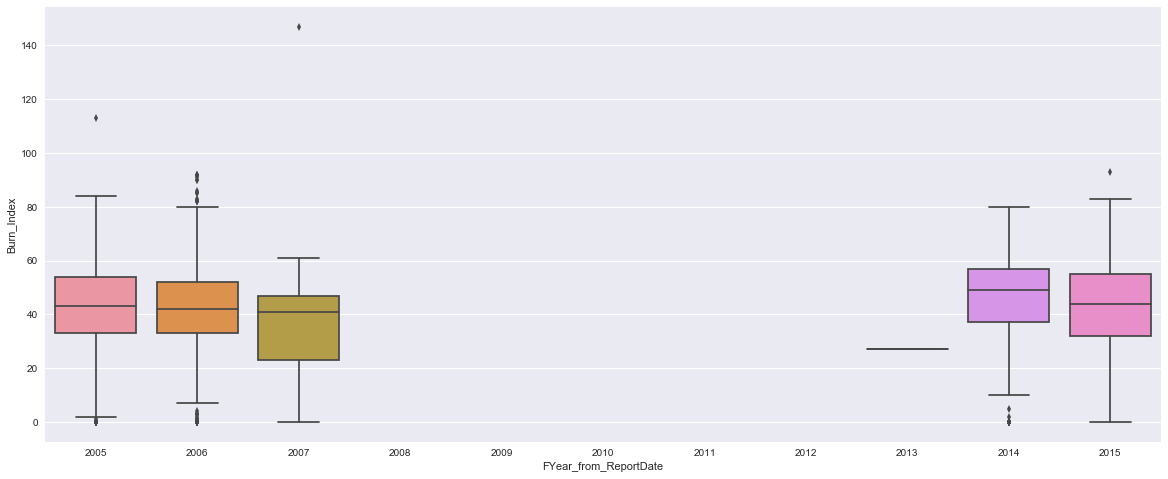

In [12]:
#investigating spread of Burn_Index
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
_ = sns.boxplot(x='FYear_from_ReportDate',y='Burn_Index',data=oregon)
sns.plt.show()

From this, it appears we are missing data from 2008 to 2012.  With high outliers in 2007 and 2005.  It looks like 2013 was also a strange year. 

## Outliers

First, we take a look at the outliers and from our boxplot, we can see that there are some high burn index outliers in the year 2005 and 2007.  I will take a look at specifically these two years and see what are the highest burn indices and how many of these outliers there are. 

In [13]:
#create two dfs with years 2005 and 2007

df_2005 = oregon[oregon['FYear_from_ReportDate']==2005].sort_values('Burn_Index',ascending=False)
df_2007 = oregon[oregon['FYear_from_ReportDate']==2007].sort_values('Burn_Index',ascending=False)

In [14]:
df_2005['Burn_Index'].head(30)

848     113.0
1473     84.0
2037     84.0
1081     78.0
940      76.0
745      76.0
916      76.0
1328     76.0
1257     76.0
723      75.0
317      75.0
1824     75.0
880      75.0
752      75.0
857      75.0
831      75.0
1655     75.0
1786     74.0
1113     74.0
1160     74.0
1163     74.0
722      74.0
554      73.0
1054     73.0
1420     73.0
1200     72.0
1595     72.0
419      72.0
498      71.0
750      71.0
Name: Burn_Index, dtype: float64

In [15]:
df_2005['Burn_Index'].mean()

43.24431818181818

In [16]:
df_2007['Burn_Index'].head(30)

7082    147.0
7295     61.0
7866     54.0
6943     54.0
6514     50.0
8296     49.0
7756     48.0
7843     48.0
7411     47.0
7018     47.0
7100     47.0
6909     47.0
7374     47.0
7362     47.0
7353     47.0
7241     47.0
6998     47.0
7269     47.0
6930     47.0
7256     47.0
6845     47.0
6620     47.0
6571     47.0
8300     47.0
8342     47.0
7800     46.0
7063     45.0
6597     45.0
7134     44.0
8313     44.0
Name: Burn_Index, dtype: float64

In [17]:
df_2007['Burn_Index'].mean()

34.08247422680412

It looks like the fire index 7082 has a burn index more than twice as high as the next highest burn index.  
- It also looks like the mean of 2005 is twice as high as 2007.  

In [18]:
df_2007.loc[7082,:]

FireYear                                    2007
Current_District                              73
Current_Unit                                   3
FireNumber                                    56
FiscalYear                                  2008
FireName                              Pass Creek
Twn                                          24S
Rng                                          01W
Sec                                            9
Subdiv                                      SWNE
County                                        10
CauseByDesc                            Lightning
GeneralDesc                            Lightning
SpecificDesc                           Lightning
Cause_Comments                               NaN
General_Restriction                            5
Industrial_Restriction                         2
Burn_Index                                   147
RegulatedUseZone                             DG2
Ign_DateTime              07/11/2007 12:00:00 AM
ReportDateAndTime   

In [19]:
df_2007_lightning = df_2007[df_2007['CauseByDesc']=='Lightning']
df_2007_lightning['Burn_Index'].mean()

42.46153846153846

In [20]:
oregon['CauseByDesc'].unique()

array([nan, 'Rancher-Farmer', 'Other-Public', 'Motorist',
       'Timber Harvest Worker', 'Ruralist-Non-Paying', 'Lightning',
       'Recreationist', 'Ruralist-Paying', 'Other Forest Mgt. Worker',
       'Other-Landowner Related', 'Hiker', 'Public Utility', 'Hunter',
       'Fisherman'], dtype=object)

In [21]:
oregon['CauseByDesc'].fillna('Unknown',inplace=True)
oregon['CauseByDesc'].unique()

array(['Unknown', 'Rancher-Farmer', 'Other-Public', 'Motorist',
       'Timber Harvest Worker', 'Ruralist-Non-Paying', 'Lightning',
       'Recreationist', 'Ruralist-Paying', 'Other Forest Mgt. Worker',
       'Other-Landowner Related', 'Hiker', 'Public Utility', 'Hunter',
       'Fisherman'], dtype=object)

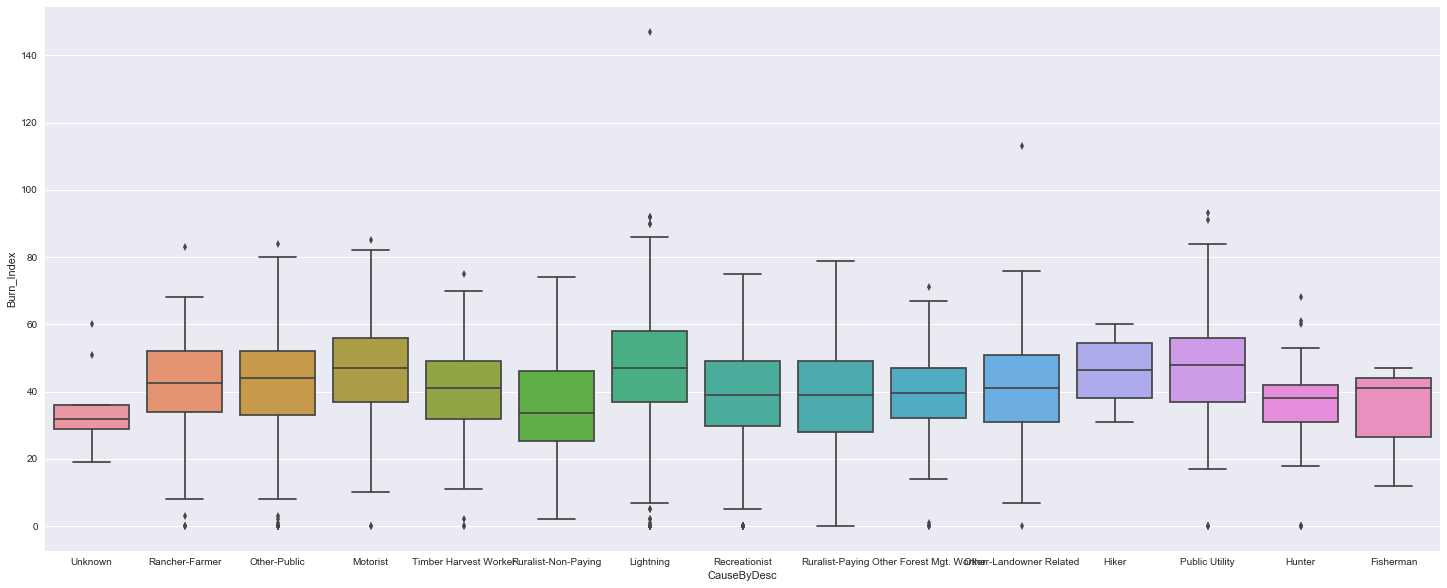

In [22]:
#using boxplot to look at causes
fig, ax = plt.subplots()
fig.set_size_inches(25,10)
_ = sns.boxplot(x='CauseByDesc',y='Burn_Index',data=oregon)
sns.plt.show()

## Missing Data: 
Now we know we are missing data from 2008 to 2013; we should look at this subgroup of the entire dataset to see what else can be missing and perhaps what other features we can estimate,eliminate,etc.  

In [23]:
#separating missing BIs to see if we can make any predictions or fill in anything
missing_BI = oregon[pd.isnull(oregon['Burn_Index'])]
missing_BI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25606 entries, 0 to 28477
Data columns (total 33 columns):
FireYear                  25606 non-null object
Current_District          25606 non-null float64
Current_Unit              25606 non-null float64
FireNumber                25606 non-null float64
FiscalYear                25606 non-null object
FireName                  25590 non-null object
Twn                       23019 non-null object
Rng                       23017 non-null object
Sec                       22978 non-null float64
Subdiv                    19514 non-null object
County                    25582 non-null float64
CauseByDesc               25606 non-null object
GeneralDesc               25153 non-null object
SpecificDesc              21990 non-null object
Cause_Comments            9797 non-null object
General_Restriction       8178 non-null float64
Industrial_Restriction    8178 non-null float64
Burn_Index                0 non-null float64
RegulatedUseZone          

In [24]:
#creating a df where BIs are not missing
df = oregon[~pd.isnull(oregon['Burn_Index'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 29 to 28489
Data columns (total 33 columns):
FireYear                  2883 non-null object
Current_District          2883 non-null float64
Current_Unit              2883 non-null float64
FireNumber                2883 non-null float64
FiscalYear                2883 non-null object
FireName                  2883 non-null object
Twn                       2883 non-null object
Rng                       2883 non-null object
Sec                       2883 non-null float64
Subdiv                    2883 non-null object
County                    2883 non-null float64
CauseByDesc               2883 non-null object
GeneralDesc               2876 non-null object
SpecificDesc              2876 non-null object
Cause_Comments            478 non-null object
General_Restriction       2883 non-null float64
Industrial_Restriction    2882 non-null float64
Burn_Index                2883 non-null float64
RegulatedUseZone          2883 non-nul

From https://gacc.nifc.gov/rmcc/predictive/fuels_fire-danger/drgloss.htm, it looks like BIs can be approximated by 10 times the flame lenght.  It looks like in the missing BIs, there are 319 entries where there are flame lengths.  We can use 10*FlameLength to approximate these 319 observations.

In [25]:
flame_length_df = missing_BI[~pd.isnull(missing_BI['Flame_length'])]
flame_length_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 60 to 8636
Data columns (total 33 columns):
FireYear                  319 non-null object
Current_District          319 non-null float64
Current_Unit              319 non-null float64
FireNumber                319 non-null float64
FiscalYear                319 non-null object
FireName                  319 non-null object
Twn                       319 non-null object
Rng                       319 non-null object
Sec                       319 non-null float64
Subdiv                    319 non-null object
County                    319 non-null float64
CauseByDesc               319 non-null object
GeneralDesc               319 non-null object
SpecificDesc              317 non-null object
Cause_Comments            2 non-null object
General_Restriction       317 non-null float64
Industrial_Restriction    317 non-null float64
Burn_Index                0 non-null float64
RegulatedUseZone          317 non-null object
Ign_DateTime   

In [26]:
flame_length_df.loc[:,'Burn_Index']=[flame_length * 10 for flame_length in flame_length_df['Flame_length']]
flame_length_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 60 to 8636
Data columns (total 33 columns):
FireYear                  319 non-null object
Current_District          319 non-null float64
Current_Unit              319 non-null float64
FireNumber                319 non-null float64
FiscalYear                319 non-null object
FireName                  319 non-null object
Twn                       319 non-null object
Rng                       319 non-null object
Sec                       319 non-null float64
Subdiv                    319 non-null object
County                    319 non-null float64
CauseByDesc               319 non-null object
GeneralDesc               319 non-null object
SpecificDesc              317 non-null object
Cause_Comments            2 non-null object
General_Restriction       317 non-null float64
Industrial_Restriction    317 non-null float64
Burn_Index                319 non-null float64
RegulatedUseZone          317 non-null object
Ign_DateTime 

/Users/johnwu/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Looks like the Burn_index has now been filled.  We should add this set to the final df.  

We can also do the same for the df we set to fill out the rest of the flame length set.

In [27]:
fulldata = pd.concat([flame_length_df,df])
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 60 to 28489
Data columns (total 33 columns):
FireYear                  3202 non-null object
Current_District          3202 non-null float64
Current_Unit              3202 non-null float64
FireNumber                3202 non-null float64
FiscalYear                3202 non-null object
FireName                  3202 non-null object
Twn                       3202 non-null object
Rng                       3202 non-null object
Sec                       3202 non-null float64
Subdiv                    3202 non-null object
County                    3202 non-null float64
CauseByDesc               3202 non-null object
GeneralDesc               3195 non-null object
SpecificDesc              3193 non-null object
Cause_Comments            480 non-null object
General_Restriction       3200 non-null float64
Industrial_Restriction    3199 non-null float64
Burn_Index                3202 non-null float64
RegulatedUseZone          3200 non-nul

In [51]:
#adding flame length per calculation
fulldata['Flame_length']=[BI/10 if flame==0 else flame for (flame, BI) in zip(fulldata['Flame_length'],fulldata['Burn_Index']) ]

In [57]:
#filling in flame length
fulldata['Flame_length'].fillna(fulldata['Burn_Index']/10,inplace=True)

In [58]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 60 to 28489
Data columns (total 33 columns):
FireYear                  3202 non-null object
Current_District          3202 non-null float64
Current_Unit              3202 non-null float64
FireNumber                3202 non-null float64
FiscalYear                3202 non-null object
FireName                  3202 non-null object
Twn                       3202 non-null object
Rng                       3202 non-null object
Sec                       3202 non-null float64
Subdiv                    3202 non-null object
County                    3202 non-null float64
CauseByDesc               3202 non-null object
GeneralDesc               3195 non-null object
SpecificDesc              3193 non-null object
Cause_Comments            480 non-null object
General_Restriction       3200 non-null float64
Industrial_Restriction    3199 non-null float64
Burn_Index                3202 non-null float64
RegulatedUseZone          3200 non-nul

In [29]:
missing_flames = fulldata[fulldata['Flame_length'].isnull()]
missing_flames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 719 to 28489
Data columns (total 33 columns):
FireYear                  865 non-null object
Current_District          865 non-null float64
Current_Unit              865 non-null float64
FireNumber                865 non-null float64
FiscalYear                865 non-null object
FireName                  865 non-null object
Twn                       865 non-null object
Rng                       865 non-null object
Sec                       865 non-null float64
Subdiv                    865 non-null object
County                    865 non-null float64
CauseByDesc               865 non-null object
GeneralDesc               858 non-null object
SpecificDesc              860 non-null object
Cause_Comments            471 non-null object
General_Restriction       865 non-null float64
Industrial_Restriction    865 non-null float64
Burn_Index                865 non-null float64
RegulatedUseZone          865 non-null object
Ign_DateT

In [59]:
#exporting as excel
writer = pd.ExcelWriter('Capstone1cleaned.xlsx')
fulldata.to_excel(writer,'Cleaned Data')
writer.save()